### Loading Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [22]:
import seaborn as sns
sns.set(style="darkgrid")

### Loading the Data

In [5]:
df=pd.read_csv(r'C:\Users\sudip\ICG02\venv\dataset\AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [6]:
mapping={'yes':1,'no':0}
df['card']=df['card'].map(mapping)

In [7]:
df.rename(columns={'card':'target'},inplace=True)

In [8]:
df.target.value_counts()

target
1    1023
0     296
Name: count, dtype: int64

In [9]:
df.columns

Index(['target', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,1319.0,0.775588,0.417353,0.000000,1.000000,1.000000,1.000000,1.00000
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


### Implementing Decision Tree from scratch

#### Defining Node Class:

In [11]:
class node():
    def __init__(self,feature=None,threshold=None,left=None,right=None,entropy_gain=None,value=None):
        self.feature=feature#parameters splitting the data
        self.threshold=threshold#boundary conditions 
        self.left=left#left node
        self.right=right#right node
        self.entropy_gain=entropy_gain#order of disorientedness
        self.value=value      

#### Defining Tree Class:

In [12]:
class decision_tree():
    def __init__(self,max_depth=None,min_samples_split=2,min_samples_leaf=1,criterion='entropy'):
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.min_samples_leaf=min_samples_leaf
        self.criterion=criterion
        self.root=None
    
    def build_tree(self,x,y,current_depth=0):
        n_samples,n_features=x.shape
        unique_classes=np.unique(y)
        #if only one class is present or max depth is reached or number of samples is less than min_samples_split
        if (n_samples<self.min_samples_split or len(unique_classes)==1)or (self.max_depth is not None and current_depth>=self.max_depth):
            leaf_value=self.most_common_class(y)
            return node(value=leaf_value)  
        #if the number of samples is leass than min_samples_leaf
        
        if n_samples<self.min_samples_leaf:
            leaf_value=self.most_common_class(y)
            return node(value=leaf_value) 
        
        #if the number of feature is zero
        if n_features==0:
            leaf_value=self.most_common_class(y)
            return node(value=leaf_value)
        #if the nmber of features is greater than zero
        best_feate,best_threshold,best_gain=self.get_best_split(x,y,n_features)
        if best_gain==0:
            leaf_value=self.most_common_class(y)
            return(node(value=leaf_value))
        left=np.where(x[:,best_feate]<=best_threshold)
        right=np.where(x[:,best_feate]>best_threshold)
        left_node=self.build_tree(x[left],y[left],current_depth+1)
        right_node=self.build_tree(x[right],y[right],current_depth+1)
        return node(feature=best_feate,threshold=best_threshold,left=left_node,right=right_node,entropy_gain=best_gain)
    
    def get_best_split(self,x,y,n_features):
        best_gain=0
        best_feature=None
        best_threshold=None
        for feature in range(n_features):
            thresholds=np.unique(x[:,feature])
            for threshold in thresholds:
                left_indices=np.where(x[:,feature]<=threshold)
                right_indices=np.where(x[:,feature]>threshold)
                if len(left_indices[0])==0 or len(right_indices[0])==0:
                    continue
                gain=self.entropy_gain(y[left_indices],y[right_indices])
                if gain>best_gain:
                    best_gain=gain
                    best_feature=feature
                    best_threshold=threshold
        return best_feature,best_threshold,best_gain
    
    def entropy_gain(self,left_y,right_y):
        p_left=len(left_y)/(len(left_y)+len(right_y))
        p_right=len(right_y)/(len(left_y)+len(right_y))
        return self.entropy(left_y)*p_left+self.entropy(right_y)*p_right    
    
    def entropy(self,y):
        if len(y)==0:
            return 0
        class_labels,counts=np.unique(y,return_counts=True)
        probabilities=counts/len(y)
        return -np.sum(probabilities*np.log2(probabilities))
    
    def most_common_class(self,y):
        class_labels,counts=np.unique(y,return_counts=True)
        return class_labels[np.argmax(counts)]
    
    def fit(self,x,y):
        self.root=self.build_tree(x,y)
        
    def predict_sample(self,sample,node):
        if node.value is not None:
            return node.value
        if sample[node.feature]<=node.threshold:
            return self.predict_sample(sample,node.left)
        else:
            return self.predict_sample(sample,node.right)
        
    def predict(self,x):
        predictions=[]
        for sample in x:
            prediction=self.predict_sample(sample,self.root)
            predictions.append(prediction)
        return np.array(predictions)    
    
    def score(self,x,y):
        predictions=self.predict(x)
        accuracy=np.sum(predictions==y)/len(y)
        return accuracy
    
    def print_tree(self,node=None,depth=0):
        if node is None:
            node=self.root
        if node.value is not None:
            print(f"{' ' * depth}Leaf: {node.value}")
            return
        print(f"{' ' * depth}Feature: {node.feature}, Threshold: {node.threshold}, Gain: {node.entropy_gain}")
        self.print_tree(node.left,depth+1)
        self.print_tree(node.right,depth+1)
        
    
        

#### Train-Test Spilt

In [13]:
#train-test split
X=df.drop('target',axis=1).values
y=df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [14]:
classifier = decision_tree(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
classifier.fit(X_train, y_train)

#### Tree printing

In [15]:
print(classifier.print_tree())

Feature: 8, Threshold: 192, Gain: 0.7818741499786546
 Feature: 1, Threshold: 37.33333, Gain: 0.7818822489155914
  Feature: 8, Threshold: 85, Gain: 0.7817280938857878
   Feature: 1, Threshold: 26.41667, Gain: 0.7817748823618484
    Feature: 1, Threshold: 21.41667, Gain: 0.7817279956905573
     Leaf: 1
     Leaf: 1
    Feature: 1, Threshold: 37.0, Gain: 0.7818091375804005
     Leaf: 1
     Leaf: 1
   Feature: 8, Threshold: 147, Gain: 0.7812800395941816
    Feature: 1, Threshold: 34.08333, Gain: 0.7817258115943702
     Leaf: 1
     Leaf: 1
    Feature: 2, Threshold: 1.85, Gain: 0.7786886966472395
     Leaf: 1
     Leaf: 1
  Feature: 8, Threshold: 16, Gain: 0.7822962809281979
   Feature: 1, Threshold: 47.33333, Gain: 0.782438518821817
    Feature: 1, Threshold: 41.08333, Gain: 0.783756661673956
     Leaf: 1
     Leaf: 1
    Feature: 2, Threshold: 3.6, Gain: 0.7786886966472395
     Leaf: 1
     Leaf: 1
   Feature: 1, Threshold: 54.75, Gain: 0.7822657804986106
    Feature: 8, Threshold: 33, 

#### Metrices

In [16]:
y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test, y_pred)

0.8068181818181818

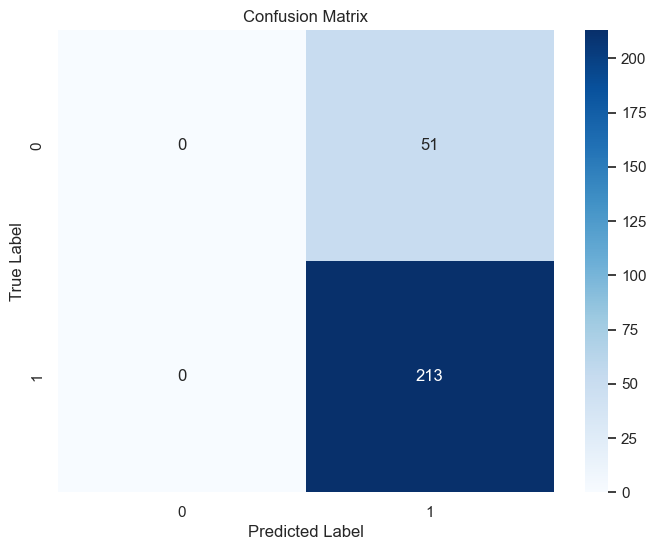

In [23]:
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()